In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [11]:
df_mlp = pd.read_csv("df_alpine_tfidf.csv")

In [12]:
df_mlp

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Pinene
0,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.106952
1,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.106952
2,1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0.106952
3,2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,...,1,0,0,0,0,0,1,0,0,0.106952
4,3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0.106952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42967,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.021390
59996,42970,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.021390
59997,42971,0.0,0.00000,0.0,0.0,0.0,0.322452,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.021390
59998,42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.021390


In [13]:
df_mlp.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

In [14]:
X = df_mlp.drop(['index', 'X..Alpha-Pinene'], axis = 1)
y = df_mlp[['X..Alpha-Pinene']]

<Axes: ylabel='Count'>

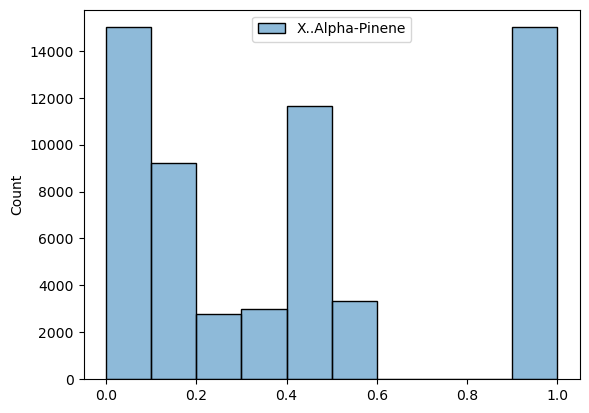

In [15]:
sns.histplot(y, bins = 10)

Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [17]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [18]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
mean_absolute_error(y_val, y_pred_mlp)

0.0378678557990086

In [20]:
mean_squared_error(y_val, y_pred_mlp)

0.005810547977508326

In [21]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.07622695046706464

In [22]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.9874437326007728

In [23]:
#val
r2_score(y_val, y_pred_mlp)

0.956826997607139

Residual plots for each target variable

Feature Selection

In [24]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([4.62863079e-04, 1.70156379e-03, 9.28393441e-05, 7.70616710e-05,
       1.84249777e-04, 9.49900948e-04, 1.24649767e-04, 3.46788467e-03,
       1.92739099e-05, 1.02473221e-04, 5.75650839e-05, 2.17858443e-03,
       4.00532408e-05, 5.60950081e-05, 1.52609789e-04, 7.23690615e-04,
       2.35163438e-04, 1.24241900e-04, 6.42054960e-04, 2.01512157e-04,
       6.20709730e-04, 3.72037333e-03, 3.60874572e-04, 2.68860722e-03,
       1.61054378e-04, 2.77078967e-05, 1.82773630e-04, 4.04489806e-05,
       2.67359977e-04, 4.38999022e-05, 1.44548424e-02, 8.13336129e-05,
       2.17452062e-04, 6.76509335e-05, 4.84267528e-04, 7.52634466e-05,
       8.02342335e-05, 8.43746548e-04, 3.62435076e-05, 1.51246378e-04,
       5.09990176e-05, 1.76955440e-04, 8.75243351e-06, 9.39860019e-03,
       1.67966328e-04, 6.87278132e-05, 2.75975076e-03, 3.99887120e-05,
       4.02407203e-04, 1.16407901e-04, 1.14185404e-04, 1.64272420e-05,
       4.31149028e-04, 6.21534768e-05, 1.96055339e-03, 2.30243583e-04,
      

In [19]:
selector.threshold_

0.0021321961620469083

In [20]:
mask = selector.get_support()

In [21]:
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_mlp[selected_features]
selected_X

,tfidf_7,tfidf_11,tfidf_21,tfidf_23,tfidf_30,tfidf_43,tfidf_46,tfidf_78,tfidf_82,tfidf_93,...,euphoric,focused,giggly,hungry,relaxed,talkative,blueberry,diesel,earthy,mango
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.152565,0.0,0.000000,...,1,0,0,1,1,0,0,0,0,0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.152565,0.0,0.000000,...,1,0,0,1,1,0,0,0,0,0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.253181,...,1,1,0,0,1,0,0,0,0,0
3,0.0,0.0,0.000000,0.0,0.0,0.198545,0.0,0.204993,0.0,0.000000,...,1,1,0,1,0,0,0,0,0,0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.312348,0.0,0.000000,...,0,0,0,0,1,0,0,0,0,0
59996,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.108601,...,0,0,0,0,0,0,0,0,0,0
59997,0.0,0.0,0.349629,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0
59998,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['tfidf_7',
 'tfidf_11',
 'tfidf_21',
 'tfidf_23',
 'tfidf_30',
 'tfidf_43',
 'tfidf_46',
 'tfidf_78',
 'tfidf_82',
 'tfidf_93',
 'tfidf_97',
 'tfidf_109',
 'tfidf_119',
 'tfidf_121',
 'tfidf_128',
 'tfidf_136',
 'tfidf_141',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_168',
 'tfidf_199',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_233',
 'tfidf_245',
 'tfidf_253',
 'tfidf_265',
 'tfidf_267',
 'tfidf_273',
 'tfidf_280',
 'tfidf_281',
 'tfidf_285',
 'tfidf_303',
 'tfidf_304',
 'tfidf_306',
 'tfidf_309',
 'tfidf_312',
 'tfidf_319',
 'tfidf_329',
 'tfidf_336',
 'tfidf_345',
 'tfidf_353',
 'tfidf_357',
 'tfidf_362',
 'tfidf_370',
 'indica',
 'sativa',
 'aroused',
 'euphoric',
 'focused',
 'giggly',
 'hungry',
 'relaxed',
 'talkative',
 'blueberry',
 'diesel',
 'earthy',
 'mango']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_mlp_tfidf_alpine.pkl")
joblib.dump(selector, "selector_mlp_tfidf_alpine.pkl")

['selector_mlp_tfidf_alpine.pkl']

In [25]:
import joblib

selected_X = joblib.load("selected_X_mlp_tfidf_alpine.pkl")

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.054906957700049795

In [30]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.9550629096617146

In [31]:
#val
r2_score(y_val, y_pred_mlpreg)

0.9334606962019105

Hyperparameter Tuning

In [32]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'],
              'max_iter': [200, 500, 1000]
              }

In [33]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [34]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [35]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [36]:
joblib.dump(rscv, "rscv_mlp_tfidf_alpine.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_tfidf_best_params_alpine.pkl")

['rscv_mlp_tfidf_best_params_alpine.pkl']

MLP fit (after hyperparameter tuning)

In [37]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter = 1000, hidden_layer_sizes = (50,100,50), activation = 'relu', early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.04482606544997747

In [39]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.006520285549515228

In [40]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.08074828511810779

In [41]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.9634273662461241

In [42]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.9513753655391215

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [43]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [44]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_tfidf_alpine.pkl")
joblib.dump(y_test, "y_test_mlpreg_tfidf_alpine.pkl")

['y_test_mlpreg_tfidf_alpine.pkl']

In [45]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.04497001907820042

In [46]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.006236961903674924

In [47]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.07897443829287375

In [48]:
r2_score(y_test, y_pred_mlpreg_test)

0.9533548978601052

Error analysis

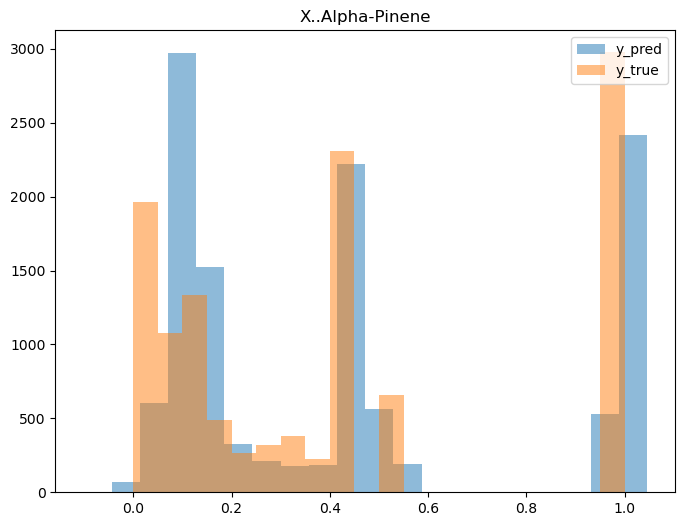

<Figure size 640x480 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_tfidf_alpine.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.976
P-value: 0.000


<Axes: >

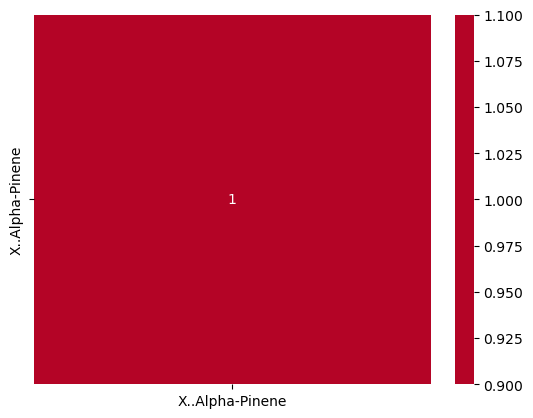

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)